Supernova_all/cfalc_allsn/sn1997E_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (12)


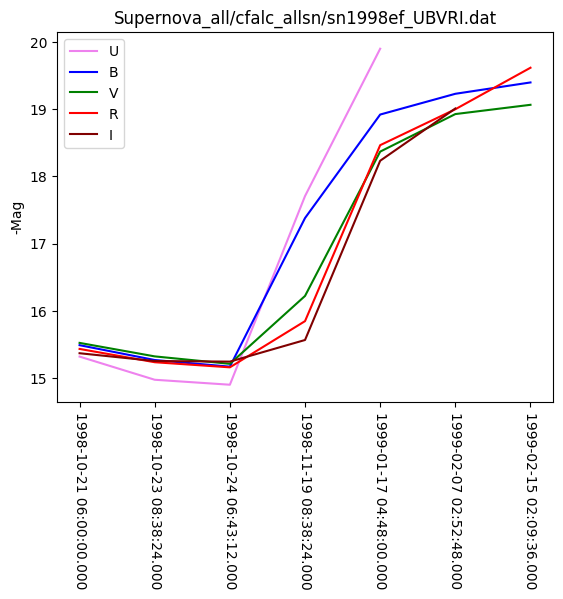

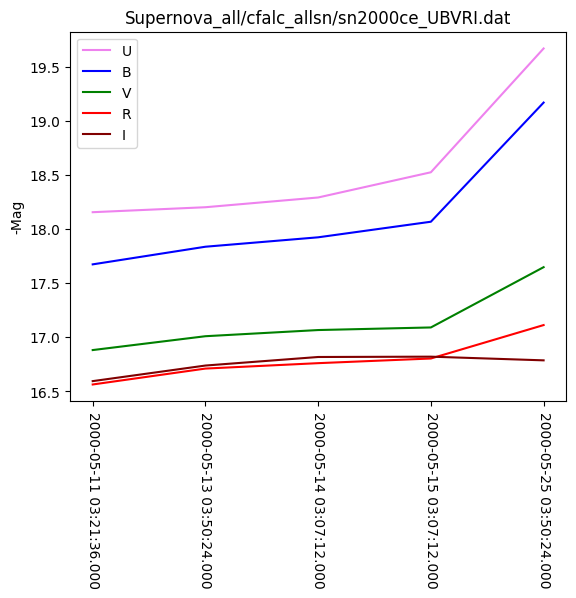

Supernova_all/cfalc_allsn/sn1999ac_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (16)
Supernova_all/cfalc_allsn/sn2000cx_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (17)
Supernova_all/cfalc_allsn/sn1998aq_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (57)


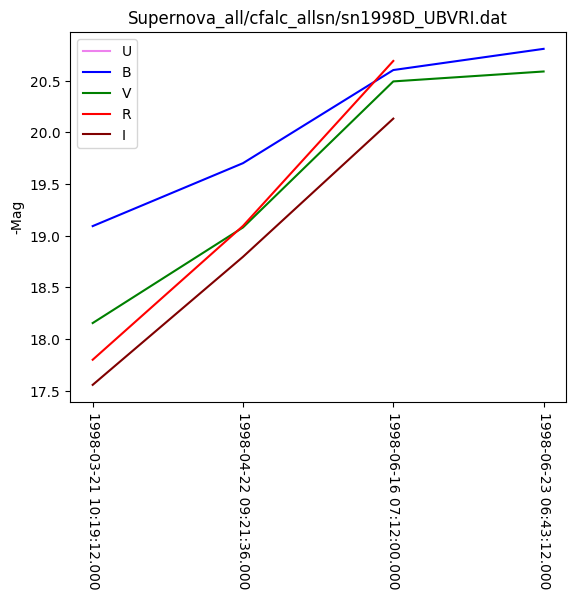

Supernova_all/cfalc_allsn/sn1999gh_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (17)


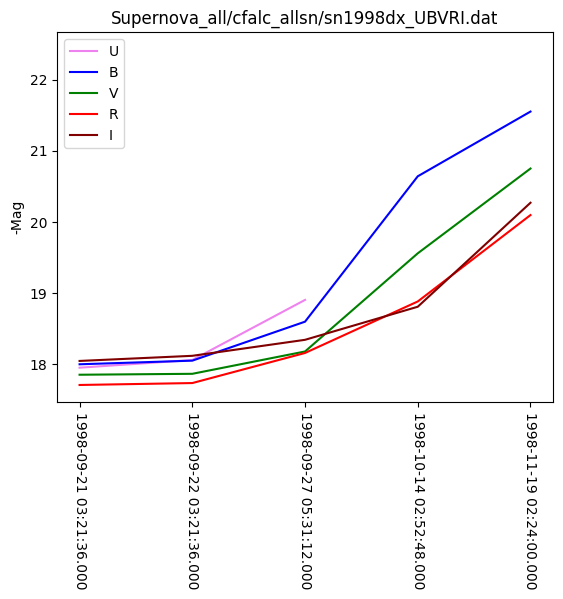

Supernova_all/cfalc_allsn/sn1998V_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (12)
Supernova_all/cfalc_allsn/sn1998bp_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (15)
Supernova_all/cfalc_allsn/sn1997bp_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (12)
Supernova_all/cfalc_allsn/sn1997cn_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (13)


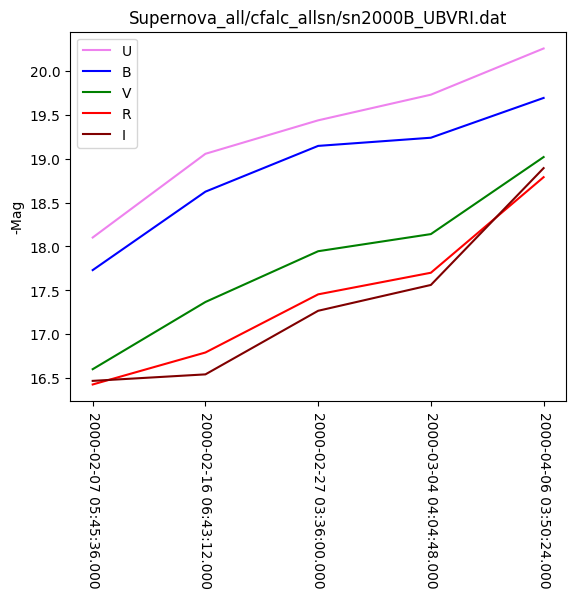

Supernova_all/cfalc_allsn/sn2000fa_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (11)


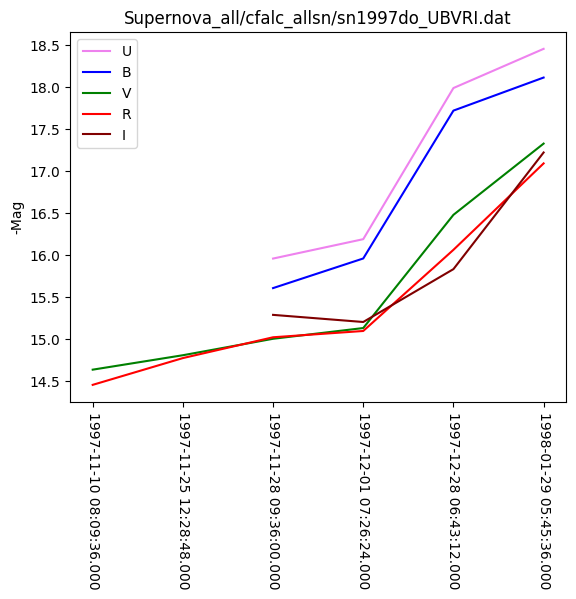

Supernova_all/cfalc_allsn/sn1997cw_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (16)


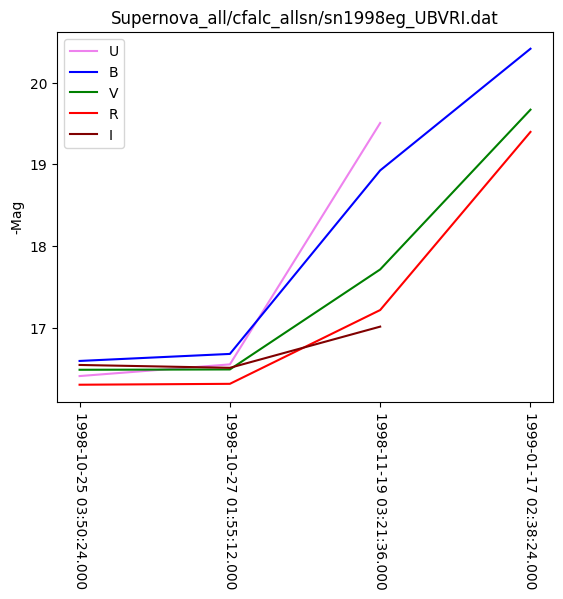

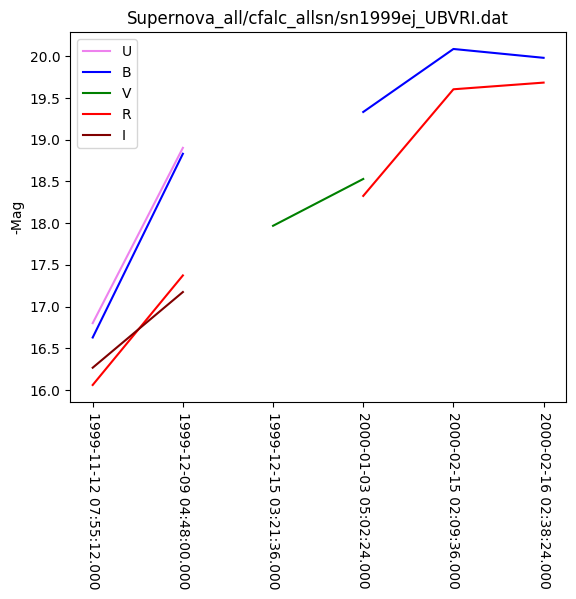

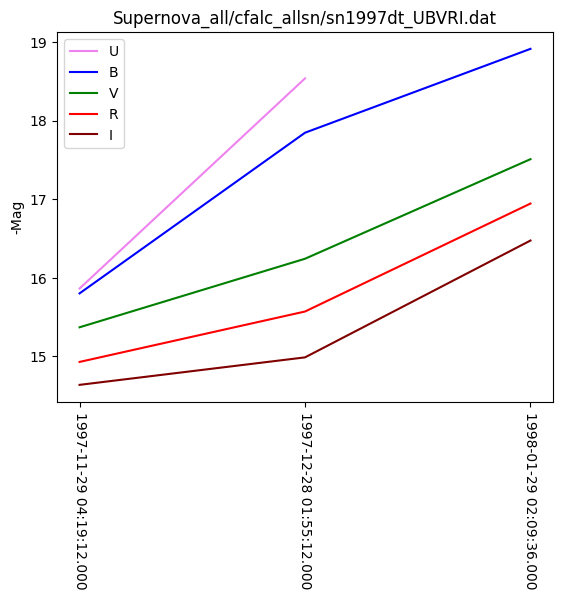

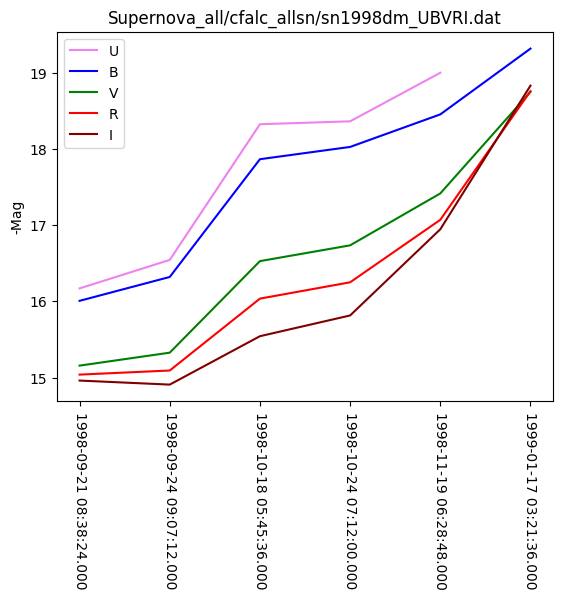

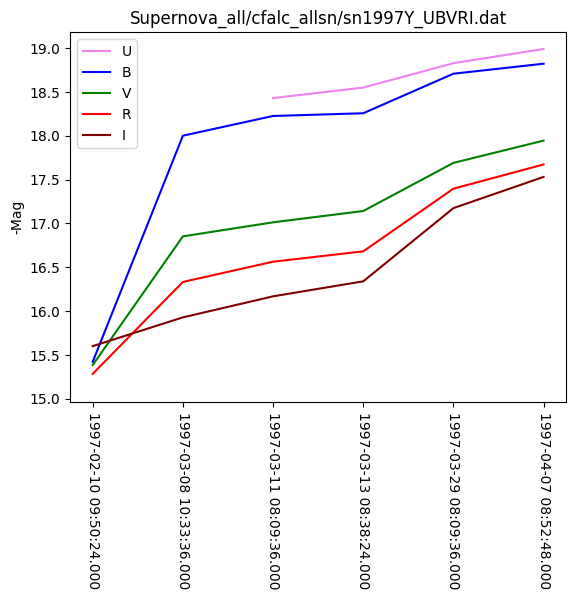

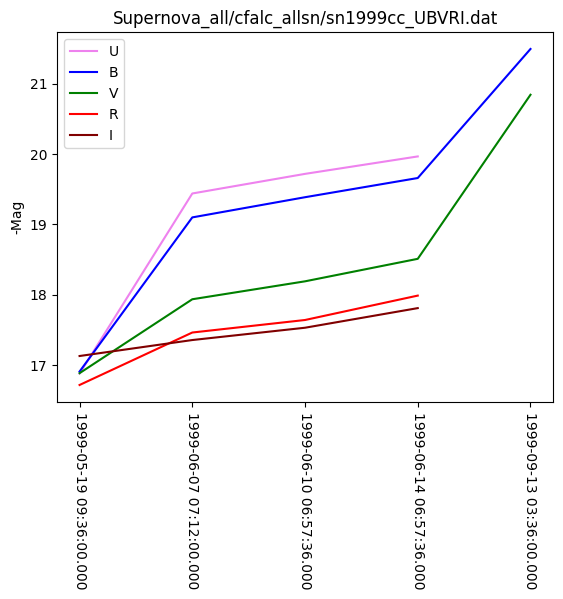

Supernova_all/cfalc_allsn/sn1998ab_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (13)
Supernova_all/cfalc_allsn/sn1999aa_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (22)


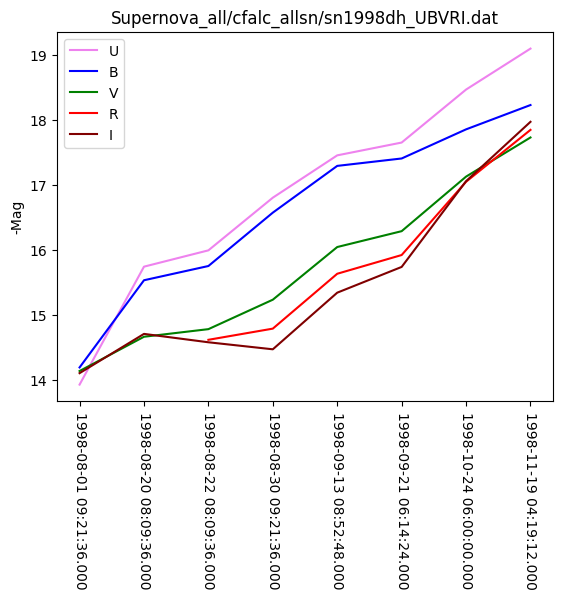

Supernova_all/cfalc_allsn/sn1999dq_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (28)


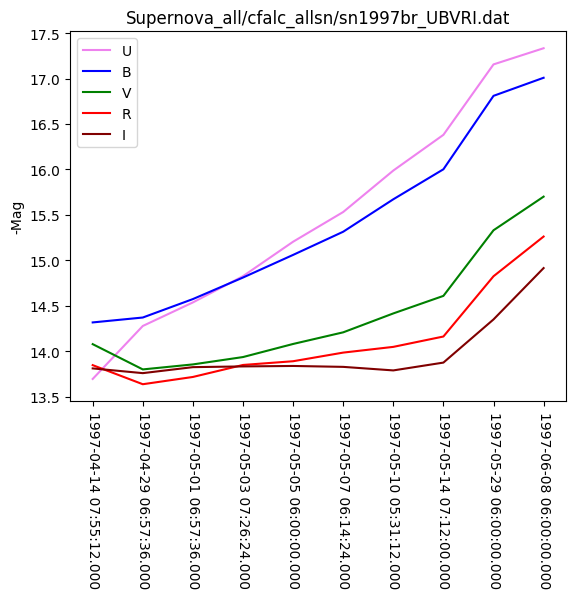

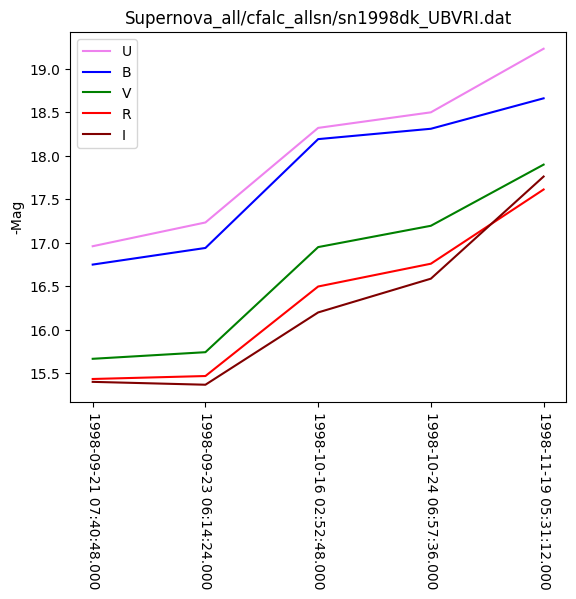

Supernova_all/cfalc_allsn/sn1994ae_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (28)


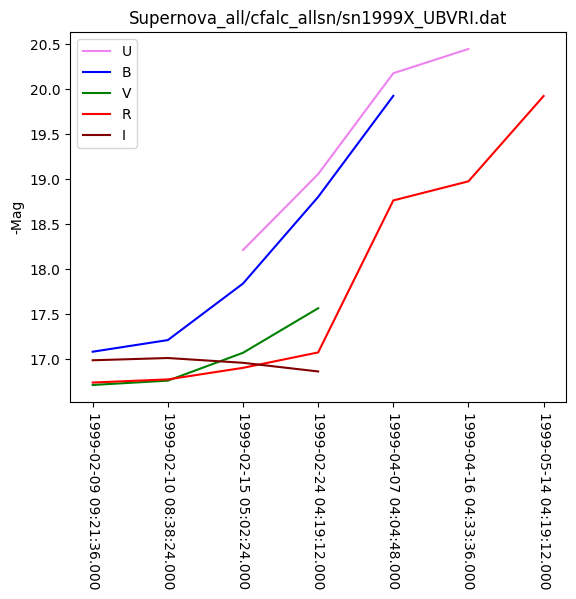

Supernova_all/cfalc_allsn/sn1997bq_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (12)


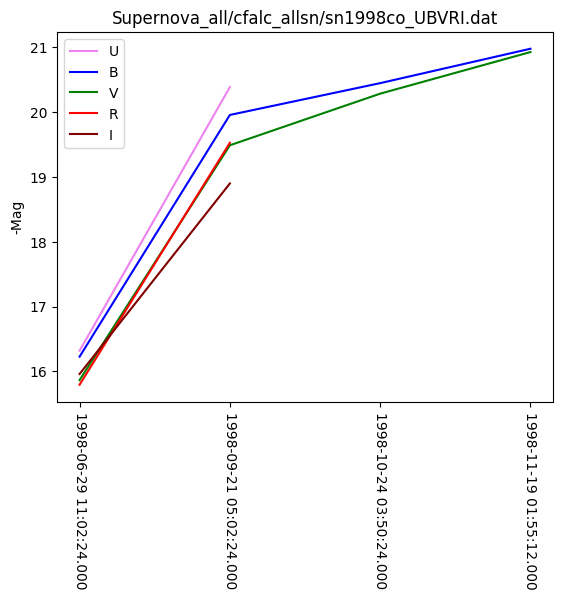

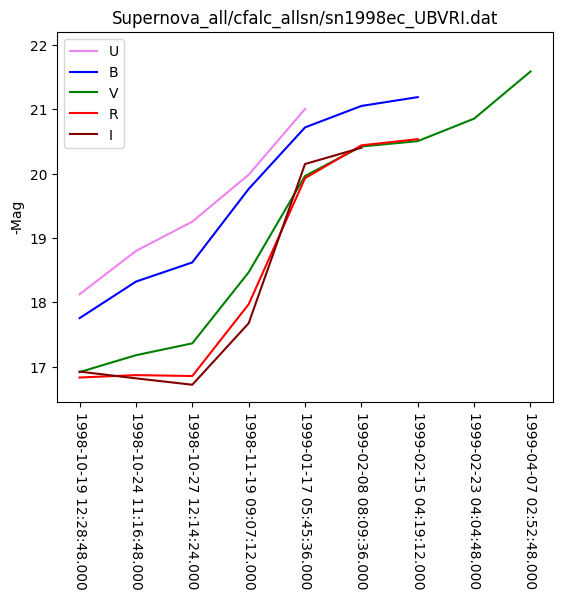

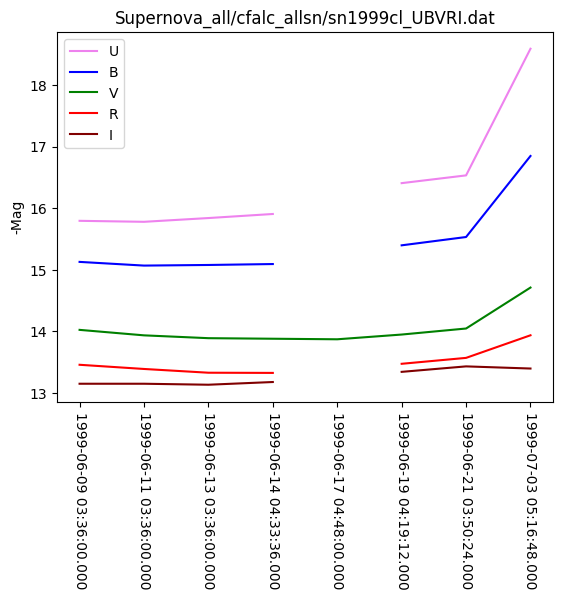

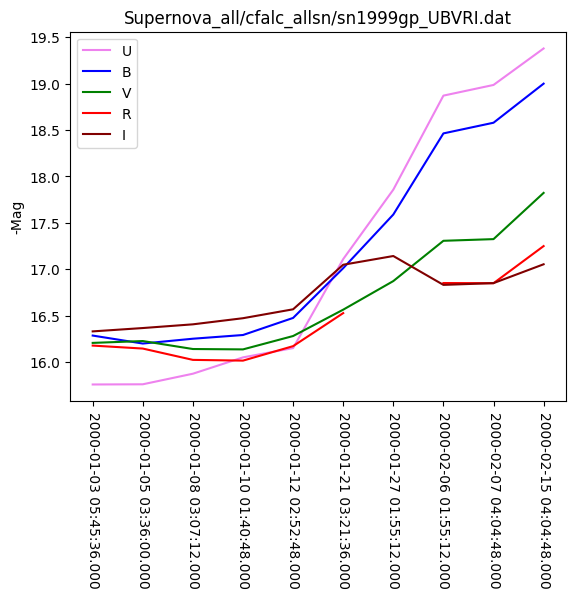

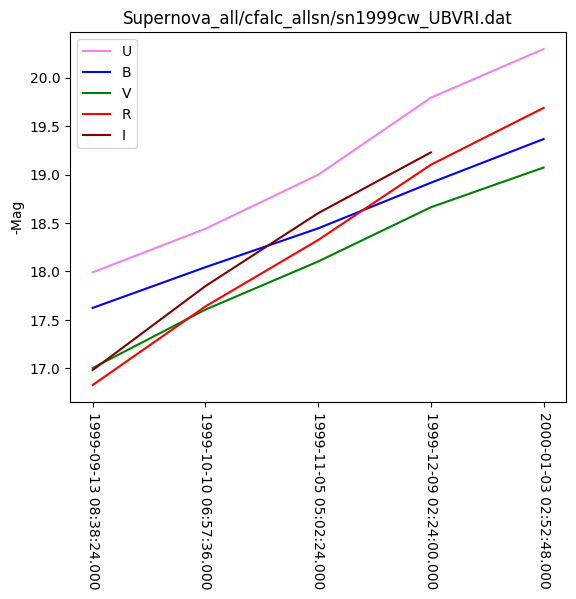

Supernova_all/cfalc_allsn/sn2000cn_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (19)


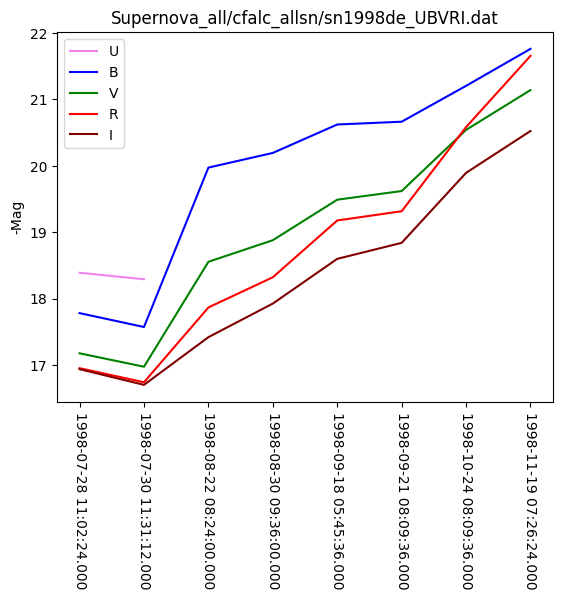

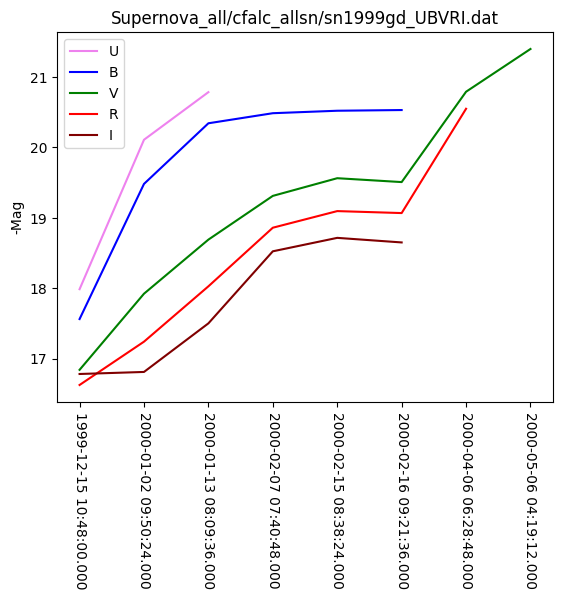

Supernova_all/cfalc_allsn/sn1998es_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (19)
Supernova_all/cfalc_allsn/sn2000dk_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (12)
Supernova_all/cfalc_allsn/sn1999by_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (21)
Supernova_all/cfalc_allsn/sn1998bu_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (79)


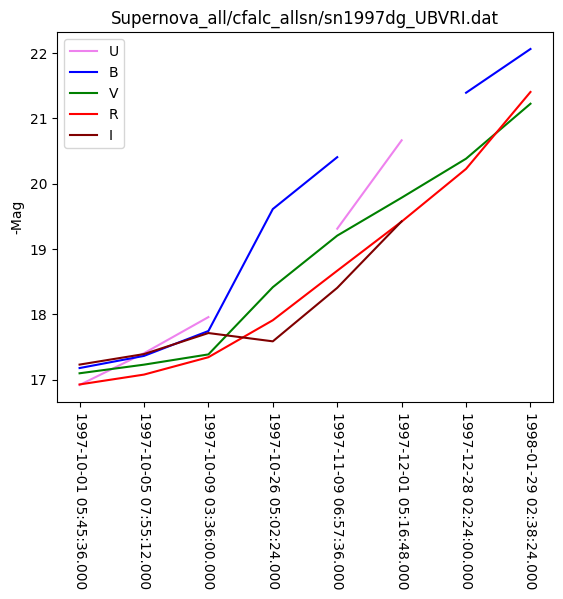

Supernova_all/cfalc_allsn/sn2000cf_UBVRI.dat ignored due to error: Length of values (10) does not match length of index (12)


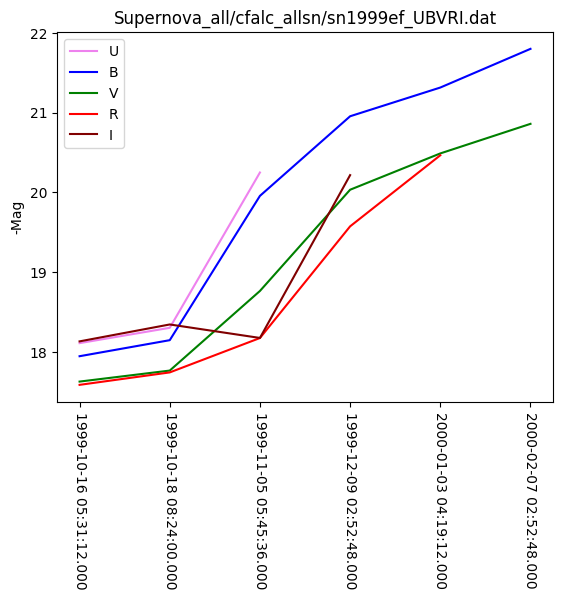

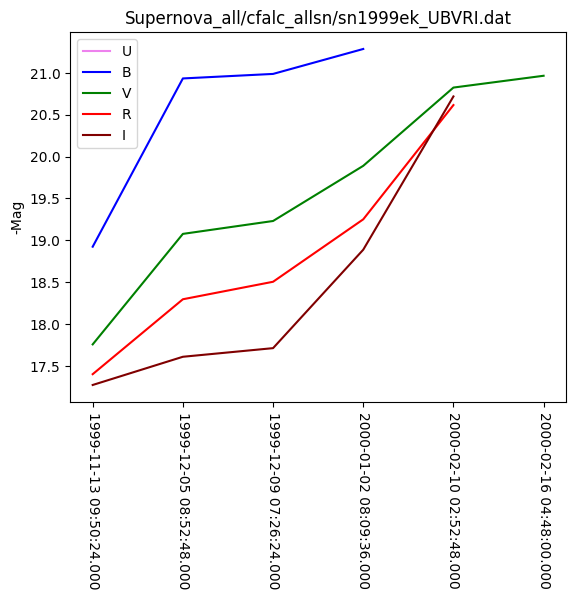

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, 
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        # Adjust HJD if it's smaller than 2450000
        if df["HJD"].iat[0] < 2450000:
            df["HJD"] += 2450000

        # Convert HJD to ISO date format
        df['HJD'] = Time(df['HJD'], format='jd', scale='utc').iso[:10]
        
        # Plot light curves for each filter
        for filter, color in [["U", "violet"], ["B", "blue"], ["V", "green"], ["R", "red"], ["I", "#800000"]]:
            plt.plot(df["HJD"].values, df[filter].values, label=filter, color=color)
        
        plt.title(file)
        plt.ylabel("-Mag")
        plt.xticks(rotation=270)
        plt.legend()
        
        # Show the plot (or save it with plt.savefig("filename.png") if preferred)
        plt.show()
        
    except Exception as e:
        print(f"{file} ignored due to error: {e}")


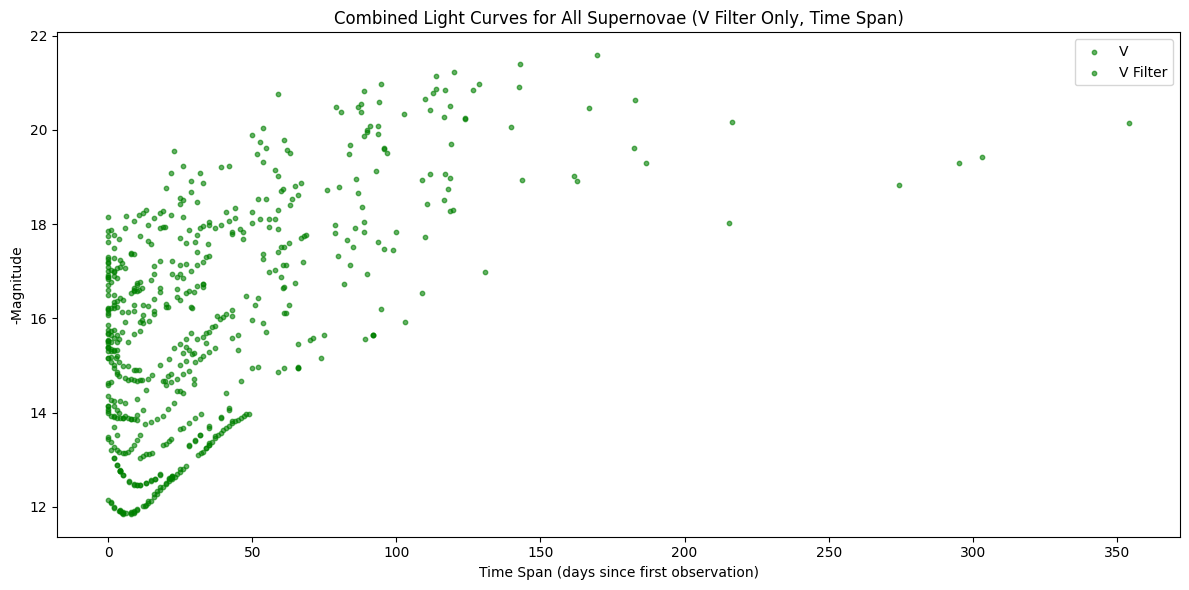

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize lists to store time span (days since first observation) and V magnitudes for all SNe
V_data = {
    "Time_Span": [],
    "Mag": []
}

# Loop through each file and extract V filter data
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        # Adjust HJD if it's smaller than 2450000
        if df["HJD"].iat[0] < 2450000:
            df["HJD"] += 2450000

        # Calculate time span in days (days since the first observation in each file)
        time_span = df["HJD"] - df["HJD"].iloc[0]

        # Collect data for V filter only
        V_data["Time_Span"].extend(time_span.values)
        V_data["Mag"].extend(df["V"].values)
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Plot the V filter data for all SNe based on time span in one single diagram
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the V filter's combined data using scatter for better clarity
plt.scatter(V_data["Time_Span"], V_data["Mag"], color="green", s=10, alpha=0.6, label="V Filter")

# Set plot labels and title
plt.title("Combined Light Curves for All Supernovae (V Filter Only, Time Span)")
plt.xlabel("Time Span (days since first observation)")
plt.ylabel("-Magnitude")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



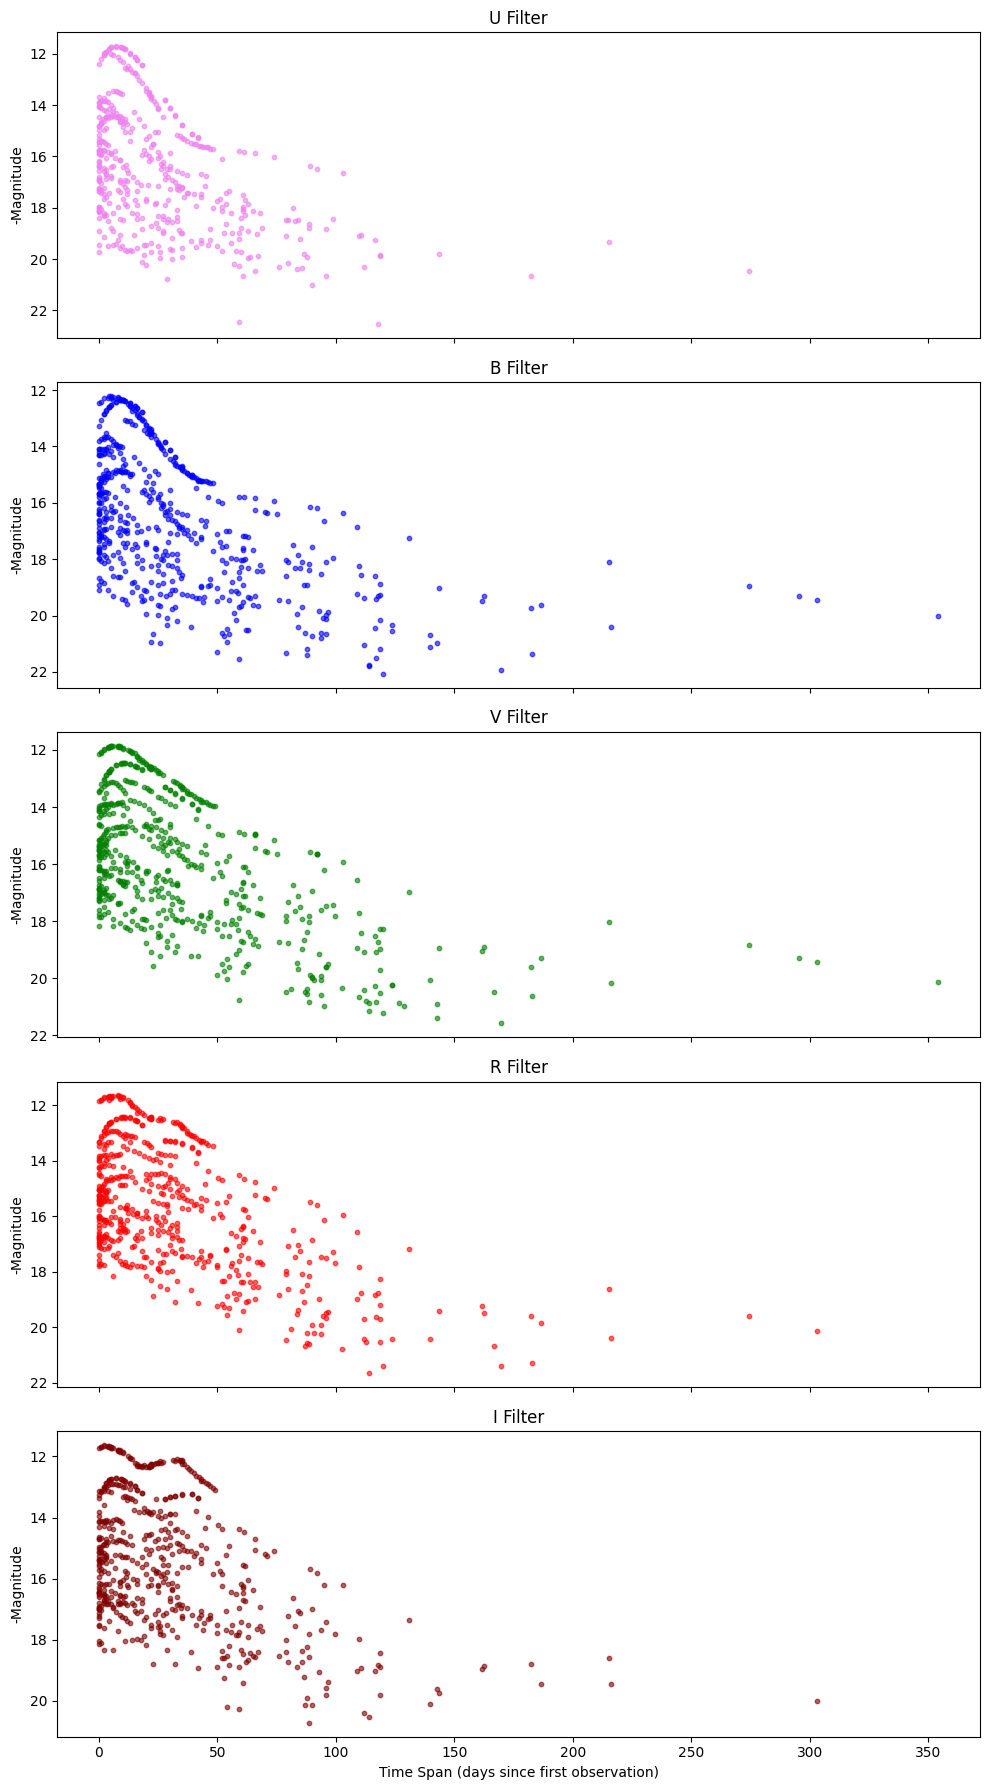

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize dictionaries to store time span and magnitude data for each filter across all SNe
all_filters_data = {
    "U": {"Time_Span": [], "Mag": []},
    "B": {"Time_Span": [], "Mag": []},
    "V": {"Time_Span": [], "Mag": []},
    "R": {"Time_Span": [], "Mag": []},
    "I": {"Time_Span": [], "Mag": []}
}

# Loop through each file and extract data for each filter
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        # Adjust HJD if it's smaller than 2450000
        if df["HJD"].iat[0] < 2450000:
            df["HJD"] += 2450000

        # Calculate time span in days (days since the first observation in each file)
        time_span = df["HJD"] - df["HJD"].iloc[0]

        # Collect data for each filter separately
        for filter in ["U", "B", "V", "R", "I"]:
            all_filters_data[filter]["Time_Span"].extend(time_span.values)
            all_filters_data[filter]["Mag"].extend(df[filter].values)
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up the color for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    axs[i].scatter(all_filters_data[filter]["Time_Span"], all_filters_data[filter]["Mag"],
                   color=filter_colors[filter], s=10, alpha=0.6)
    axs[i].set_ylabel("-Magnitude")
    axs[i].set_title(f"{filter} Filter")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days since first observation)")

# Adjust layout
plt.tight_layout()
plt.show()


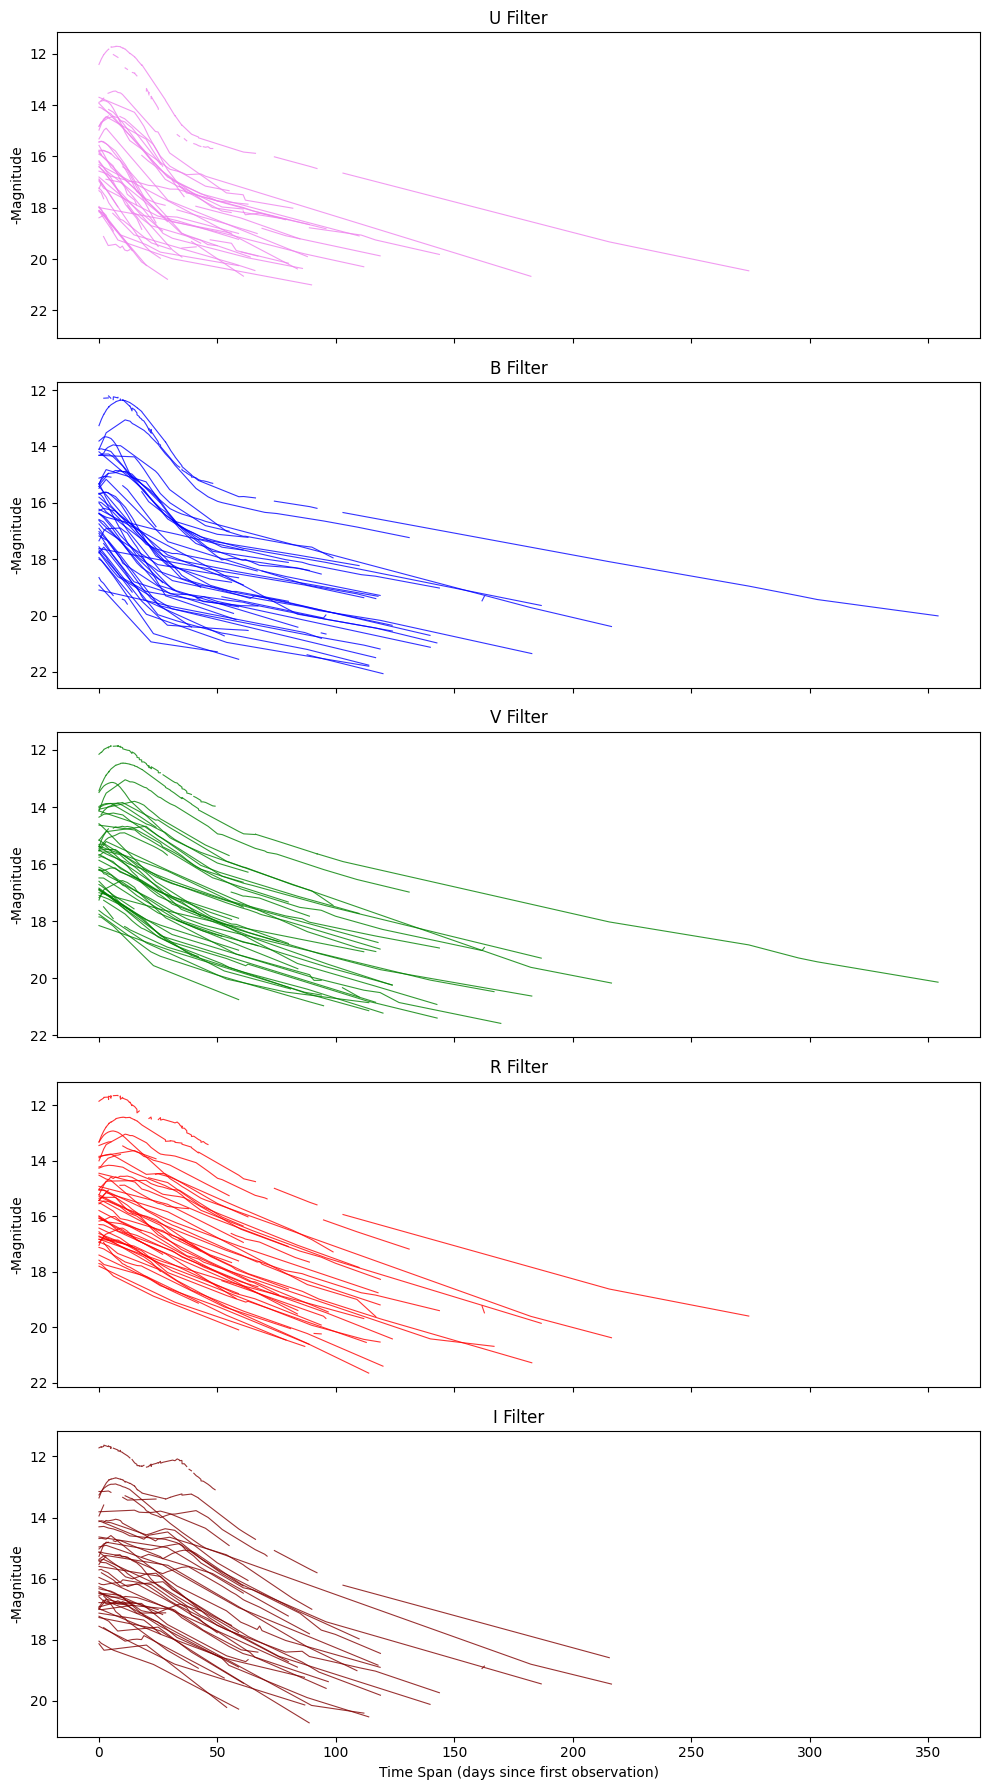

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize dictionaries to store data for each filter, with each supernova as a separate entry
all_filters_data = {
    "U": [],
    "B": [],
    "V": [],
    "R": [],
    "I": []
}

# Loop through each file and extract data for each filter, storing each supernova separately
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        # Adjust HJD if it's smaller than 2450000
        if df["HJD"].iat[0] < 2450000:
            df["HJD"] += 2450000

        # Calculate time span in days (days since the first observation in each file)
        time_span = df["HJD"] - df["HJD"].iloc[0]

        # Collect data for each filter separately, storing each supernova as a separate curve
        for filter in ["U", "B", "V", "R", "I"]:
            all_filters_data[filter].append({"Time_Span": time_span.values, "Mag": df[filter].values})
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up the color for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot, with separate lines for each supernova
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    for supernova in all_filters_data[filter]:
        # Plot each supernova's data as a line
        axs[i].plot(supernova["Time_Span"], supernova["Mag"], color=filter_colors[filter], alpha=0.8, linewidth=0.8)
    axs[i].set_ylabel("-Magnitude")
    axs[i].set_title(f"{filter} Filter")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days since first observation)")

# Adjust layout
plt.tight_layout()
plt.show()


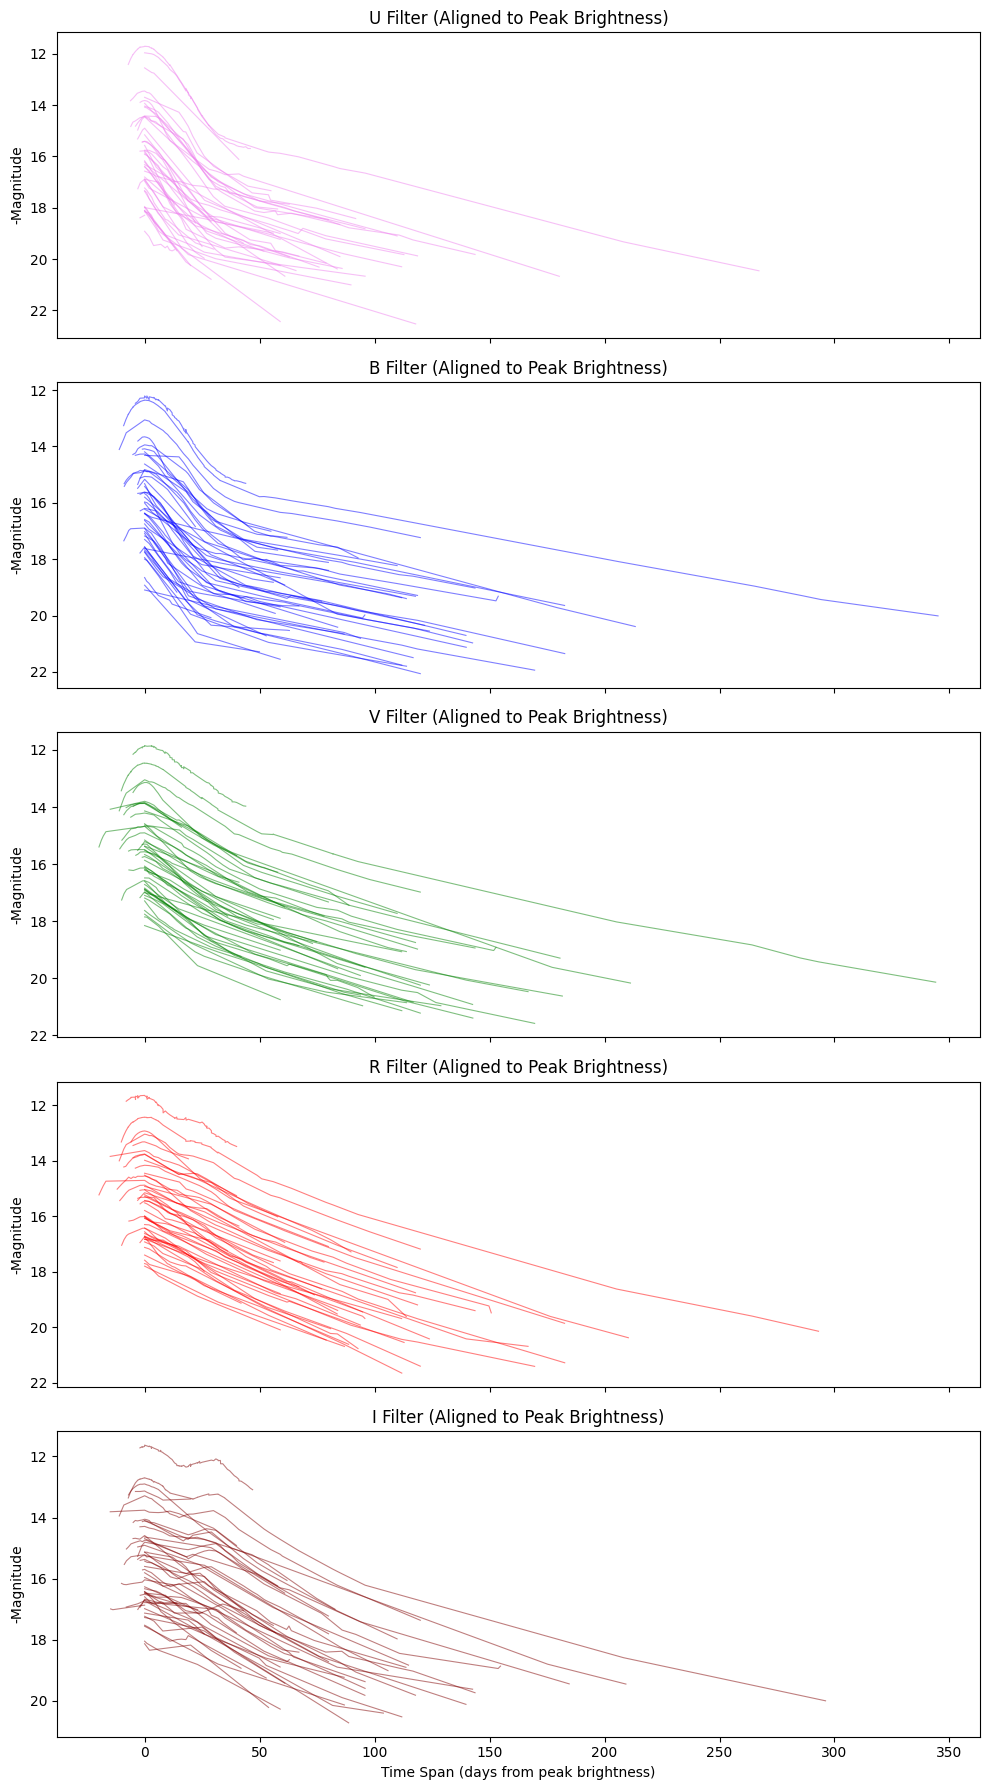

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

# Initialize dictionaries to store data for each filter, with each supernova as a separate entry
all_filters_data = {
    "U": [],
    "B": [],
    "V": [],
    "R": [],
    "I": []
}

# Loop through each file and extract data for each filter, storing each supernova separately
for file in glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        # Adjust HJD if it's smaller than 2450000
        if df["HJD"].iat[0] < 2450000:
            df["HJD"] += 2450000

        # Loop through each filter and adjust the time span to start at peak brightness
        for filter in ["U", "B", "V", "R", "I"]:
            # Drop NaN values to avoid issues with finding the minimum
            filter_data = df[['HJD', filter]].dropna()

            # Check if data exists for this filter
            if not filter_data.empty:
                # Find the time (HJD) of peak brightness (minimum magnitude)
                peak_time = filter_data.loc[filter_data[filter].idxmin(), "HJD"]

                # Calculate the time span relative to the peak brightness
                adjusted_time_span = filter_data["HJD"] - peak_time

                # Store the adjusted time span and magnitudes for this supernova
                all_filters_data[filter].append({
                    "Time_Span": adjusted_time_span.values,
                    "Mag": filter_data[filter].values
                })
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up colors for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot, with separate lines for each supernova
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    for supernova in all_filters_data[filter]:
        # Plot each supernova's data as a line
        axs[i].plot(supernova["Time_Span"], supernova["Mag"], color=filter_colors[filter], alpha=0.5, linewidth=0.8)
    axs[i].set_ylabel("-Magnitude")
    axs[i].set_title(f"{filter} Filter (Aligned to Peak Brightness)")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days from peak brightness)")

# Adjust layout
plt.tight_layout()
plt.show()
